In [1]:
from offloading_dataloader import Dataloader, plot_example
import big_decoder
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.special import softmax

class_autoencoder_path = '../networks/big_decoder.pth'
batch_size = 1024

In [2]:
dtype = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor
dataloader = Dataloader(image_path='../data/train-images.idx3-ubyte',
                        label_path='../data/train-labels.idx1-ubyte',
                        dtype=dtype, batch_size=batch_size)

or_img, trns_img, lbl, pose = dataloader.sample(100)

F:\OneDrive\Documents\University\Bachelor Thesis\active_mnist_thesis\offloading_dataloader.py:81: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:189.)
  self.images = torch.Tensor(np.reshape(images, [images.shape[0], 1, images.shape[1], images.shape[2]]))


Active MNIST Dataloader initialized on <class 'torch.cuda.FloatTensor'>
batch_size = 1024, iterations = 64
     Sampling indices
     Creating random transformation values
     Padding images
     Transforming images


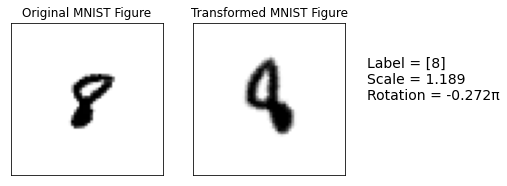

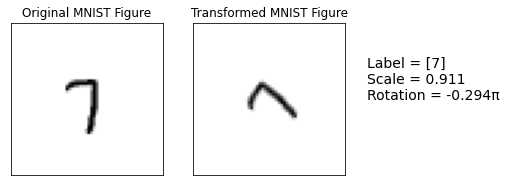

In [3]:
plot_example(or_img, trns_img, lbl, pose, number_examples=2)

finished training


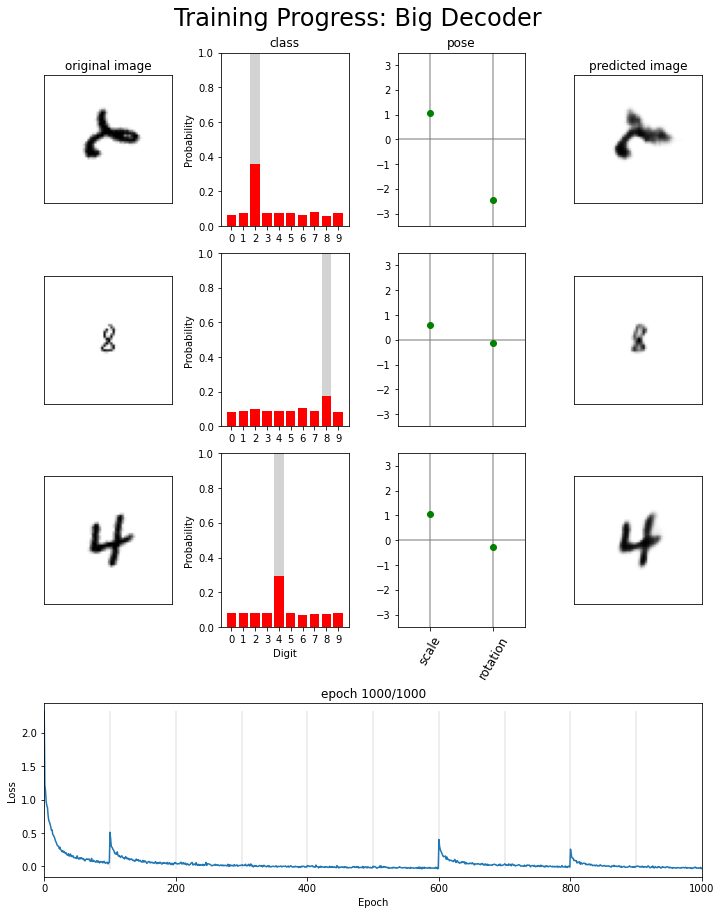

In [4]:
# Training
dtype = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor

decoder = big_decoder.Decoder(dtype=dtype, batch_size=batch_size)
decoder.cuda()
loss = decoder.train_net(dataloader, max_epochs=1000, sample_length=100)
torch.save(decoder.state_dict(), class_autoencoder_path)
print('finished training')

In [7]:
def predict_and_plot(n, classes, poses, title=''):

    decoder = big_decoder.Decoder(dtype=dtype, batch_size=batch_size)
    decoder.load_state_dict(torch.load(class_autoencoder_path))
    decoder.eval()

    pred_images = torch.squeeze(decoder(torch.Tensor(classes), torch.Tensor(poses))).detach().numpy()

    fig, axs = plt.subplots(ncols=3, nrows=n, figsize=(9, n*3),constrained_layout=True)
    for i in range(n):
        axs[i, 0].bar(range(10), classes[i], color='red')
        axs[i, 0].set_xticks(range(10))
        axs[i, 0].set_ylabel('Probability')
        axs[i, 0].set_ylim(0, 1)

        axs[i, 1].vlines(range(2), -4, 4, colors='grey', alpha=0.7, zorder=0)
        axs[i, 1].hlines(0, -1, 2, colors='grey', alpha=0.7, zorder=0)
        axs[i, 1].scatter(range(2), poses[i], c='green', zorder=1)
        axs[i, 1].set_ylim(-3.5, 3.5)
        axs[i, 1].set_xlim(-0.5, 1.5)
        axs[i, 1].set_xticks([])

        axs[i, 2].imshow(pred_images[i], cmap=cm.gray_r)
        axs[i, 2].set_xticks([])
        axs[i, 2].set_yticks([])

    axs[0, 0].set_title('class')
    axs[n-1, 0].set_xlabel('Digit')
    axs[0, 1].set_title('pose')
    axs[n-1, 1].set_xticks(range(2))
    axs[n-1, 1].set_xticklabels(['scale', 'rotation'], rotation=60, fontsize=12)
    axs[0, 2].set_title('predicted image')

    plt.suptitle(title, fontsize=18)
    plt.show()

In [8]:
# Testing random predictions
n = 5
peak = 5

indices = np.array([range(n), np.random.randint(0, 10, size=n)])
classes =  np.random.normal(size=(n, 10))
classes[indices[0], indices[1]] += peak
for i in range(len(classes)):
    classes[i] = softmax(classes[i])

poses = np.random.normal(size=(n, 2))
# poses = np.zeros(shape=(n, 5))

predict_and_plot(n, classes, poses, title='Random recreations')

NotImplementedError: 